<a href="https://colab.research.google.com/github/diamondmangrum/UQ-Bio2022/blob/main/Module_3_1_Stoichiometries%2C_Propensities%2C_and_ODE_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Solving the Rate Equation Using Stoichiometries and Propensities**


---

In [3]:
!wget -q --recursive -np bitbio.org/ode/ -P /content/ --accept py, JPG, jpg,png,pdf --reject index*

In [4]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
figSize=800

---
# *Learning Objectives*

---
Stoichiometries and Propensities can be used to model temporal dynamics using coupled ODEs. 

After this workbook students should be able to:
*   Write Stoichiometries and Propensity fucntions using the Law of Mass action
*   Evaluate the propensity funtion and rate equations and understand what it means when its positive, negative, or zero.
*   Solve for the solution to dx/dt rate equation from S and W(x,t).
* Understand how parameters can influence quasi-steady state equilibrium assumptions
* Understand Phase-space digrams and quiver plots
* Visualizing trajectories in Phase-space

---
# **Problem 1: Birth-Decay Process for a Protein of Interest**
A birth-decay process for an arbirary protein is described by a single protein which is made a constant rate and decays according to the Law of mass Action
>1. Using the parameters t=0, k1=0.8, and k2 = 0.02, write the Stoichiometry Matrix as a 1 by 2 numpy array, and the propensity as a function of time and state W(x,t). W(x,t) should return a 2 by 1 numpy vector describing the rate of production in the first term and the rate of decay in the second term.
2. Write the initial state of the system (x) described by starting with 10 proteins at t=0.
3. Analyze W(x,t) at x=5, x=40 and x=100 using t=0. What do you notice about the ratio of prodction rate to decay rate? What does this mean for dx/dt?
5. Numerically solve the differenetial equation given by: dx/dt = S * w(t,x), with an intial time of 0, final time of 200 using the same k1 and k2 above. Use an initial condition of x=[0]. Make a line plot of the trajectory.
6. Resolve Numerical integration in part 4 using x=[40] and x=[100]. Make line plots of the trajectories on the same figure.

---

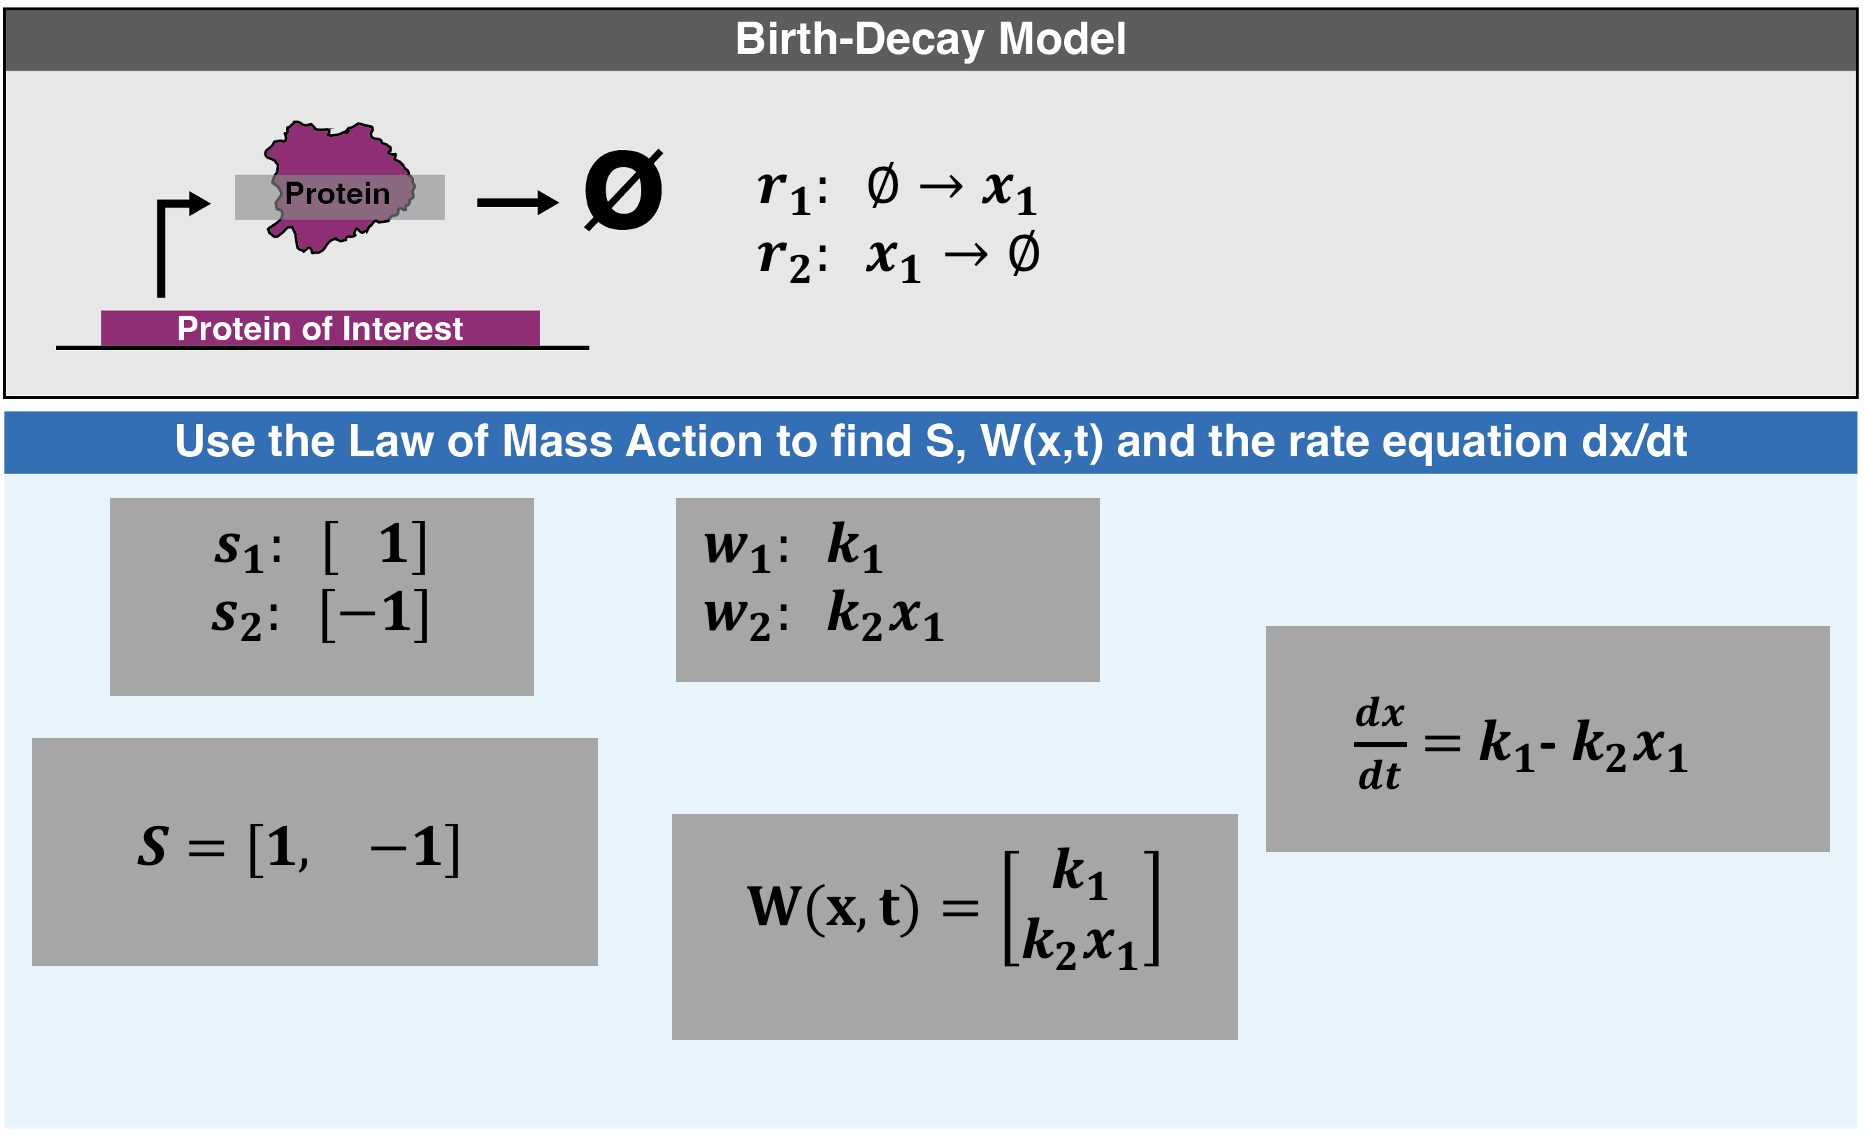

In [ ]:
Image('/content/bitbio.org/ode/Figure1.png',width=figSize)

**Problem 1 Part 1**:  Using the parameters t=0, k1=0.8, and k2 = 0.02, write the Stoichiometry Matrix as a 1 by 2 numpy array, and the propensity as a function of time and state W(x,t). W(x,t) should return a 2 by 1 numpy vector describing the rate of production in the first term and the rate of decay in the second term.

In [5]:
# Use this area to replace _ with the correct answers
k1=0.8
k2=0.02
S=np.array([1,-1])
def W(x,t):
  rate=np.array([k1,k2*x[0]]) #in python x[0] represents are x1
  return rate

def dxdt(x,t):
  return S @ W(x,t)

**Problem 1 Part 2**: Write the initial state of the system (x) described by starting with 10 proteins at t=0.

In [6]:
# Use this space to write the initial condition.
initialState=np.array([10])
print(initialState)


[10]


**Problem 1 Part 3**: Analyze W(x,t) at x=5, x=40 and x=100 using t=0. What do you notice about the ratio of production rate to decay rate? What does this mean for dx/dt?

In [7]:
# Analyze the propensity function at x=[5],x=[40],x=[100], then print the result
firstX=np.array([5])
secondX=np.array([40])
thirdX=np.array([100])
print(W(firstX,0))
print(W(secondX,0))
print(W(thirdX,0))




[0.8 0.1]
[0.8 0.8]
[0.8 2. ]




---
In this box, discuss the meaning of these numbers and how they balance 
eachother:




**Problem 1 Part 4**: Use `odeint` to numerically solve the differenetial equation given by: dx/dt = S * w(t,x), with an intial time of 0, final time of 200 using the same k1 and k2 above. Make a plot of x[0] over time. Use an initial condition of x=[0].

In [8]:
# Use this space to solve for the coupled ODE.
initialState=np.array([10])
timeSpan=np.linspace(0,200,201)

def dxdt(x,t):
  return S @ W(x,t)

trajectory=odeint(dxdt,initialState,timeSpan)
print(trajectory)

[[10.        ]
 [10.59403963]
 [11.17631667]
 [11.74706383]
 [12.30650946]
 [12.85487732]
 [13.39238676]
 [13.91925281]
 [14.43568625]
 [14.94189364]
 [15.4380774 ]
 [15.92443601]
 [16.40116405]
 [16.86845229]
 [17.32648761]
 [17.77545321]
 [18.21552872]
 [18.64689015]
 [19.06971004]
 [19.48415755]
 [19.89039844]
 [20.28859522]
 [20.67890718]
 [21.06149045]
 [21.43649805]
 [21.80408001]
 [22.16438335]
 [22.51755217]
 [22.86372775]
 [23.2030486 ]
 [23.53565048]
 [23.86166646]
 [24.18122691]
 [24.49445968]
 [24.80149003]
 [25.10244075]
 [25.3974322 ]
 [25.68658244]
 [25.97000713]
 [26.24781965]
 [26.5201311 ]
 [26.7870504 ]
 [27.04868433]
 [27.30513756]
 [27.55651268]
 [27.80291025]
 [28.04442881]
 [28.28116498]
 [28.51321347]
 [28.74066709]
 [28.96361683]
 [29.18215186]
 [29.39635961]
 [29.60632576]
 [29.8121343 ]
 [30.01386757]
 [30.21160624]
 [30.40542943]
 [30.59541465]
 [30.78163792]
 [30.96417373]
 [31.14309508]
 [31.31847356]
 [31.4903793 ]
 [31.65888109]
 [31.82404634]
 [31.98594

**Problem 1 Part 5**: Resolve Numerical integration in part 4 using x=[40] and x=[100]. Make line plots of the trajectories on the same figure.

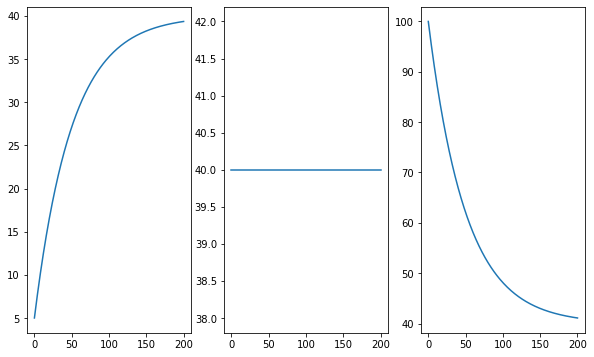

In [9]:
# Use this space to solve the two trajectories and make line plots of the trajectory over time
trajectory0=odeint(dxdt,np.array([5]),timeSpan)
trajectory1=odeint(dxdt,np.array([40]),timeSpan)
trajectory2=odeint(dxdt,np.array([100]),timeSpan)

fig, ax =plt.subplots(1,3, figsize=(10,6))
ax[0].plot(timeSpan, trajectory0)
ax[1].plot(timeSpan, trajectory1)
ax[2].plot(timeSpan, trajectory2)


---

# **Problem 2: Quasi-SteadyState Analysis of Michaelis-Mentin Dynamics**

Michaelis-Mentin dyanamics can be analysed using two different methods, the full system using the Law of Mass Action, and simplfied system using the Quasi-Steady state assumption. But as we will see, this is only true for under certain paramter combinations.

> 1.  Write the Stoichimetry matrix and a propensity function for Michaelis-Menten Dynamics using only the law of mass action. 
2. Numerically solve for the trajectory of the coupled ODE of the model in part 1 using a time span from 0 to 100 minutes, and an initial condition of 100 Enzymes, 1000 substrates, 0 ES-Complexes, and 0 product.
3. Write the Stoichiometry Matrix and propensity function for a the Michaelis Menten modul using the Quasi-Steady state equilibrium assumption.
4. Numerically solve for the trajectory of the coupled ODE model in Part 3 using a time span from 0 to 200 minutes, and an initial condition of 100 total Enzymes, 1000 Substraits and 0 Product.

---

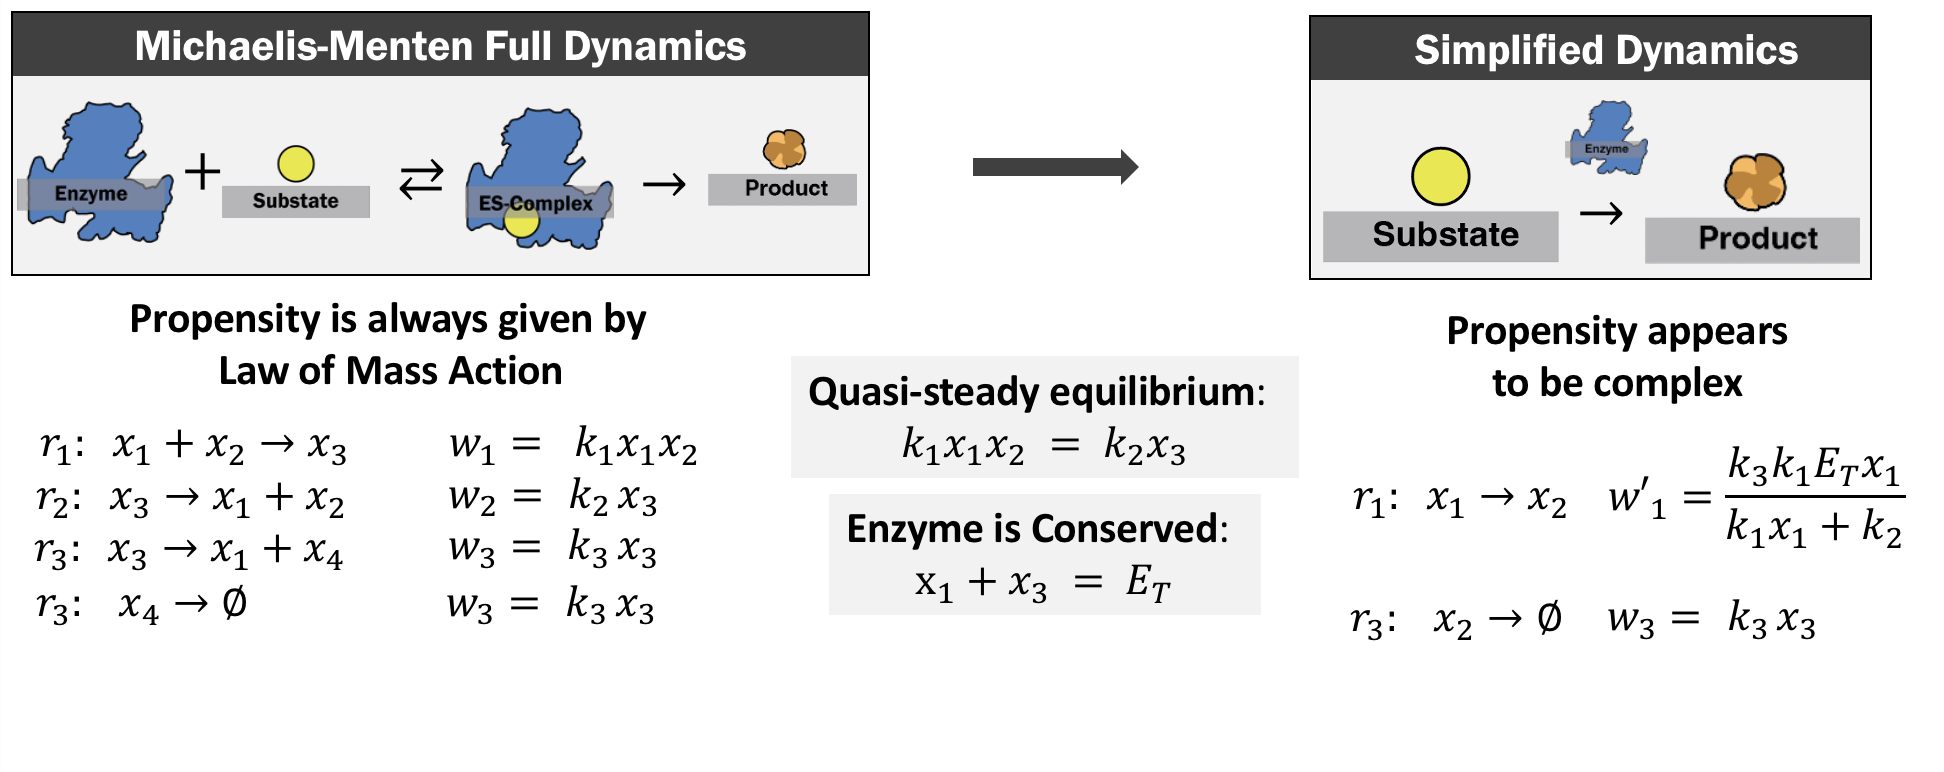

In [10]:
Image('/content/bitbio.org/ode/Figure2.png',width=figSize)

**Problem 2 Part 1**: Write the Stoichimetry matrix and a propensity function for Michaelis-Menten Dynamics using **only the law of mass action**. Use the k1~k4 given below.

In [11]:
# Begin be defining your species is associated with each X
# Enzyme     : x[0]
# Subrate    : x[1]
# ES-Complex : x[2]
# Product    : x[43]

# Next Write the reactions in the system
# Reaction 1: x[0] + x[1] makes    x[2]
# Reaction 2: x[2]        makes    x[0] + x[1]
# Reaction 3: x[2]        makes    x[3] + x[0]
# Reaction 4: x[3]        makes    Nothing
k1=1
k2=.5
k3=.1
k4=.01
# Number of Species: 4
# Number of Reactions: 4
# Therefore S is of shape 4 x 4

S=np.array([[  -1 , 1 ,  1  ,  0],
            [  -1 ,  1 ,  0  ,  0],
            [  1 ,  -1 , -1  ,  0],
            [  0 ,  0 ,   1  ,  -1]])

# Number of Reactions: 34
# Therefore W(x,t) returns a length 4 Vector
def W(x,t):
  rate=np.array([k1*x[0]*x[1],x[1],k2*x[2],k4*x[3]])
  return rate

**Problem 2 Part 2:** Numerically solve for the trajectory of the coupled ODE of the model in part 1 using a time span from 0 to 200 minutes, and an initial condition of 100 Enzymes, 1000 substrates, 0 ES-Complexes, and 0 product.

Make a plot of each species over time-span.

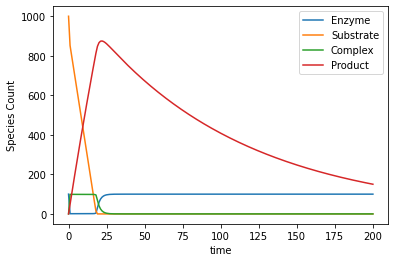

In [12]:
# USe this area to solve for Problem 2 part 2. Replace _ with the correct reponse
initialState=np.array([100,1000,0,0])
timeSpan=np.linspace(0,200,201)

def dxdt(x,t):
  rate = S @ W(x,t)
  return rate

trajectory = odeint(dxdt,initialState,timeSpan)

fig,ax=plt.subplots(1,1)
ax.plot(timeSpan,trajectory)
ax.set_ylabel('Species Count')
ax.set_xlabel('time')
ax.legend(['Enzyme','Substrate','Complex','Product'])

**Problem 2 Part 3:** Write the Stoichiometry Matrix and propensity function for a the Michaelis-Menten model using the Quasi-Steady state equilibrium assumption.

In [14]:
# Begin be defining your species is associated with each X
# Substrate: x[0]
# Product: x[1]

# Next, write the reactions in the system
# Reaction 1: x[0] makes x[1]
# Reaction 2: x[1] makes Nothing

# Calculate Total number of enzyme
ETotal=100
S=np.array([[  -1  ,  0  ],
            [  1  ,  -1  ]])

# Number of Reactions: 2
# Therefore W(x,t) returns a length 2 Vector
def W(x,t):
  # Write the equations here
  rate=np.array([(k3*k1*ETotal*x[0])/(k1*x[0]+k2), k4*x[1]])
  return rate

**Problem 2 Part 4:** Numerically solve for the trajectory of the coupled ODE model in Part 3 using a time span from 0 to 200 minutes, and an initial condition of 100 total Enzymes, 1000 Substraits and 0 Product.

Make a plot of each species over time-span.

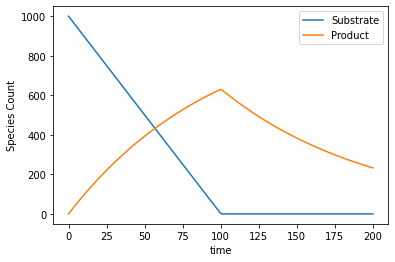

In [15]:
# Use this space to integrate the coupled ode
initialState=np.array([1000,0])
timeSpan=np.linspace(0,200,201)

def dxdt(x,t):
  #Return dxdt as a function of x and t
  return S @ W(x,t)

trajectory=odeint(dxdt,initialState,timeSpan)
fig,ax=plt.subplots(1,1)
ax.plot(timeSpan,trajectory)
ax.set_ylabel('Species Count')
ax.set_xlabel('time')
ax.legend(['Substrate','Product'])


---

# **Problem 3: LacI-Lambda-cl Toggle Switch Bifurcation**

Toggle stiches are a system in which the system can toggle between two different stable points. A plasmid can be used to make a LacI and Lambdacl repress eachother. When one becomes highly expressed, it will inhibit the production of the other one, but this dynamic can be reversed, creating a toggle that changes depending on the initial state of the system. Analysing the dynamics of this system will be better understood in "phase space"

> 1.  Write dxdt as a function of (x,t). Use the Parameters given.
2. Make a vector field of dxdt(x,t) over a grid of points from 0 to 40 in x1 and x2. Plot the vector field using plt.quiver
3. Solve for the time series trajectory of using an initial state of x=[10,1], and then again at x=[1,10], again at [35,35], and then x=[31,30]. Use the initial time and final time of 0 and 2000 minutes respestively. 

---

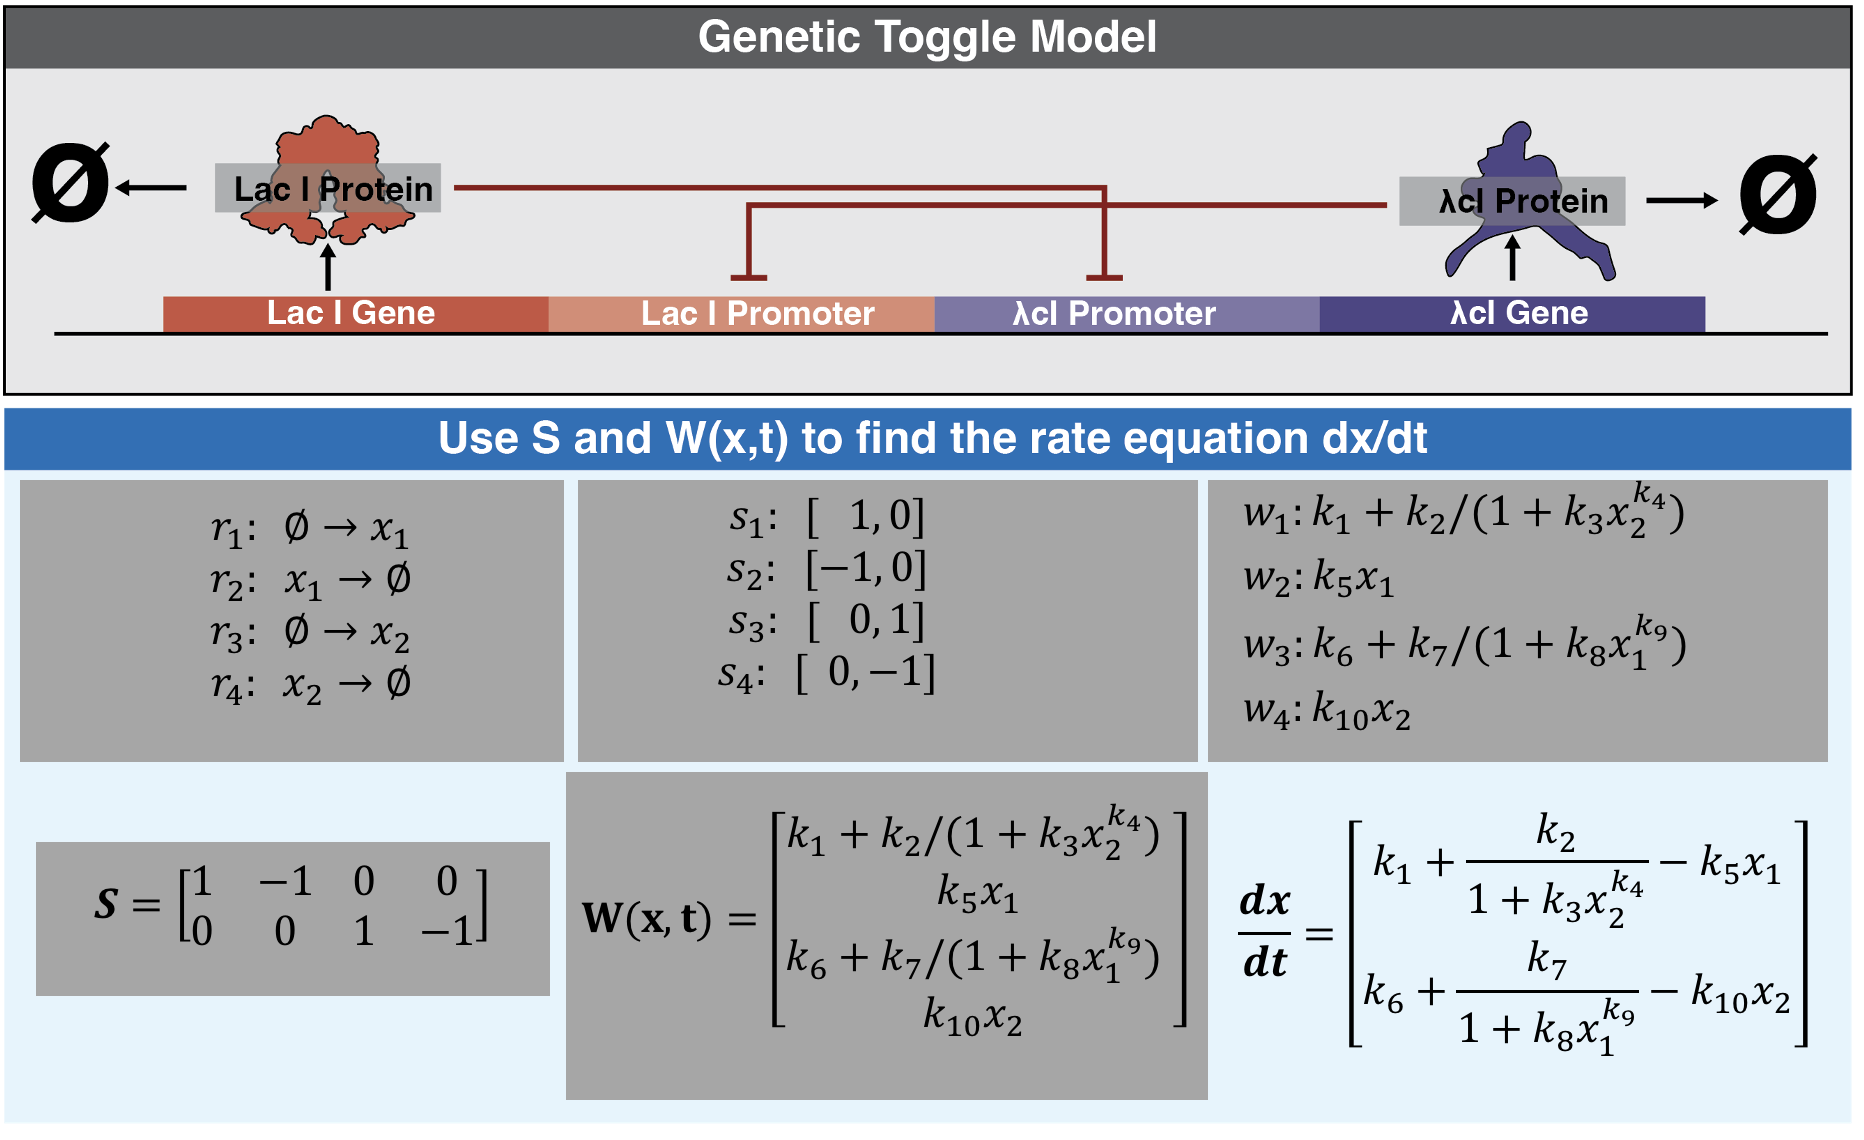

In [16]:
Image('/content/bitbio.org/ode/Figure3.png',width=figSize)

**Problem 3 Part 1:** Write dxdt as a function of (x,t), using the parameters below.

In [17]:

#     k1.  k2.  k3.  k4.  k5.  k6.  k7.  k8.  k9.  k10.  
k1=.02*3 ;k2=1.2;k3=0.1 ;k4=2 ;k5=0.02 ;
k6=.02*3 ;k7=1.2 ;k8=0.1 ;k9=2 ;k10=0.02 ;

def dxdt(x,t):
  rate=np.array([k1+k2/(1+k3*x[1]**k4)-k5*x[0],k6+k7/(1+k8*x[0]**k9)-k10*x[1]])
  return rate

**Problem 3 Part 2:** Make a vector field of dxdt(x,t) over a grid of points from 0 to 40 in x1 and x2. Plot the vector field using plt.quiver

In [18]:
# Use this space to solve for dxdt over a grid of points
xRange=np.arange(0,40,2)
yRange=np.arange(0,40,2)
print(xRange)
print(yRange)
[X,Y]=np.meshgrid(xRange,yRange)
print(X)
print(Y)
dx1dt=np.zeros([len(xRange),len(yRange)])
dx2dt=np.zeros([len(xRange),len(yRange)])
for i in range(len(xRange)):
  for j in range(len(yRange)):
    # write something here that puts dx1/dt into dx1 and dx2/dt into dx2
    rate= dxdt([xRange[i], yRange[j]],0)
    dx1dt[i,j]=rate[0]
    dx2dt[i,j]=rate[1]


[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
[[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 3

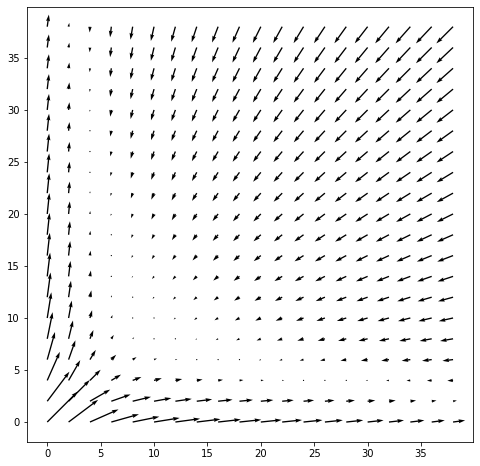

In [19]:
# Use this space to make a quiver plot the vectors
fig, ax = plt.subplots(figsize =(8, 8))
ax.quiver(X,Y, dx2dt,dx1dt)




**Problem 3 Part 3:** Solve for the time series trajectory of using an initial state of x=[10,1], and then again at x=[1,10], again at [35,35], and then x=[31,30]. Use the initial time and final time of 0 and 2000 minutes respectively. 

In [20]:
# Use this space to solve for the multipletrajectories
# trajectory [0] should return the trajectory for the initial condition x=[10,1]
# trajectory [1] should return the trajectory for the initial condition x=[1,10]
# trajectory [2] should return the trajectory for the initial condition x=[35,35]
# trajectory [3] should return the trajectory for the initial condition x=[31,30]
timeSpan= np.linspace(0,2000)
initialStates=[np.array([10,1]),np.array([1,10]),np.array([35,35]),np.array([31,30])]
trajectories=[None]*4
for i in range(len(initialStates)):
  trajectories[i]=odeint(dxdt, initialStates[i],timeSpan)

Text(0, 0.5, 'Number of LambdaCL')

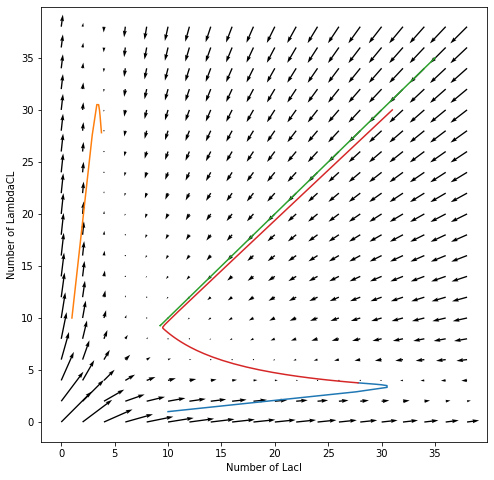

In [21]:
fig, ax = plt.subplots(figsize =(8,8))
ax.quiver(X, Y, dx2dt, dx1dt )
plt.plot(trajectories[0][:,0],trajectories[0][:,1])
plt.plot(trajectories[1][:,0],trajectories[1][:,1])
plt.plot(trajectories[2][:,0],trajectories[2][:,1])
plt.plot(trajectories[3][:,0],trajectories[3][:,1])
plt.xlabel("Number of LacI")
plt.ylabel("Number of LambdaCL")

**Workbook Completion Requirements:**
To obtain credit for this workbook, each student should:
* Complete the blanks in all three problems above.

To obtain a certificate for the course, you must complete a minimum of five notebooks from Modules 1-4 (please note that preliminary notebooks from Module 0 will not be accepted) and submit them together via email before August 15, 2022. Please submit your completed notebooks to qbio_summer_school@colostate.edu
 